# Lab 1
Nathan Ansel, Shania Tirkey

In [1]:
import monkdata as m
import dtree as d
import pandas as pd # Only for visualizing tables lol

### Assignment 0

These are our hypotheses prior to the start of the assignment. 

MONK-1: The first dataset, $(a_1 = a_2) ∨ (a_5 = 1)$, is relatively simple as it can be represented by a combination of  logical OR conditions. Decision trees should be able to learn this structure efficiently with a moderate number of splits. Thus, this dataset is not the hardest to learn. 

MONK-2: The second dataset, $a_i=1 \text{ for exactly two } i \in \{1, 2, \ldots, 6\}$, requires checking the count of specific values across multiple attributes. This introduces an XOR-like dependency, which is difficult for decision trees because they prefer hierarchical (axis-aligned) splits rather than counting-based conditions. Decision trees struggle with parity problems like this, making MONK-2 significantly harder to learn. 

MONK-3: The rule, $(a_5=1 ∧ a_4=1) ∨ (a_5 \neq 4 ∧ a_2 \neq 3)$, contains both conjunctions and disjunctions. The dataset also contains noise, which further complicates learning. However, if noise were removed, we hypothesise that the rule itself is not as difficult as the counting-based condition in MONK-2.

### Assignment 1

In [2]:
display(
    pd.DataFrame({
        'Dataset': ['MONK-1', 'MONK-2', 'MONK-3'],
        'Entropy': [d.entropy(m.monk1), d.entropy(m.monk2), d.entropy(m.monk3)]
    })
)

,Dataset,Entropy
0,MONK-1,1.000000
1,MONK-2,0.957117
2,MONK-3,0.999806


### Assignment 2

A uniform distribution will have higher entropy as compared to a non-uniform distribution. A non-uniform distribution will have peaks or modes; it will have a range of values which are more likely to appear than other values, which reduces the overall uncertainty. This is very similar to the entropy of a real die and a fake die. A real die follows a discrete uniform distribution whereas a fake die follows a non-uniform distribution, and a real die has a higher entropy.

We can observe the following distributions and their entropies. We ran a simulation to observe how the entropies of various non-uniform and uniform distributions compare. It can be seen that uniform distributions consistently exceed their non-uniform counterparts in entropy in all scenarios.

In [3]:
from tools import calculate_entropy, generate_samples

uniform_samples = [
    generate_samples('uniform', x) for x in range(10, 2500, 10)
]
uniform_entropy = [
    calculate_entropy(samples) for samples in uniform_samples
]

non_uniform_samples = [
    generate_samples('non_uniform', x) for x in range(10, 2500, 10)
]
non_uniform_entropy = [
    calculate_entropy(samples) for samples in non_uniform_samples
]

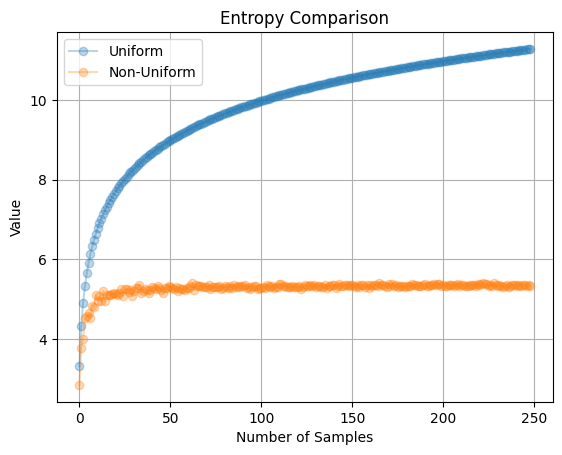

In [ ]:
import matplotlib.pyplot as plt

plt.plot(uniform_entropy, label='Uniform', marker='o', alpha=0.3)
plt.plot(non_uniform_entropy, label='Non-Uniform', marker='o', alpha=0.3)

plt.title('Entropy Comparison')
plt.xlabel('Number of Samples')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In the following example, we demonstrate another simple example where a uniform distribution's entropy exceeds that of a non-uniform distribution.

In [5]:
import numpy as np 

non_uniform = [round(num) for num in np.random.normal(0, 10, 10**5)]
uniform = range(0, 10**5)

print(f"Non uniform: {calculate_entropy(non_uniform)}")
print(f"Uniform: {calculate_entropy(uniform)}")

Non uniform: 5.370232968352129
Uniform: 16.60964047441802


### Assignment 3

The following attributes have the largest information gain for each dataset and should therefore be used to split the tree at the root node: 

Monk-1: A5 \
Monk-2: A5 \
Monk-3: A2

In [6]:
display(
    pd.DataFrame({
        'Dataset': ['MONK-1', 'MONK-2', 'MONK-3'],
        'A1': [d.averageGain(monk, m.attributes[0]) for monk in [m.monk1, m.monk2, m.monk3]], 
        'A2': [d.averageGain(monk, m.attributes[1]) for monk in [m.monk1, m.monk2, m.monk3]], 
        'A3': [d.averageGain(monk, m.attributes[2]) for monk in [m.monk1, m.monk2, m.monk3]], 
        'A4': [d.averageGain(monk, m.attributes[3]) for monk in [m.monk1, m.monk2, m.monk3]], 
        'A5': [d.averageGain(monk, m.attributes[4]) for monk in [m.monk1, m.monk2, m.monk3]], 
        'A6': [d.averageGain(monk, m.attributes[5]) for monk in [m.monk1, m.monk2, m.monk3]]
    })
)

,Dataset,A1,A2,A3,A4,A5,A6
0,MONK-1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
1,MONK-2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
2,MONK-3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


In [7]:
print("The best attribute for each dataset")
for i, monk in enumerate([m.monk1, m.monk2, m.monk3]):
    print(f"Monk {i+1}: {d.bestAttribute(monk, m.attributes)}")

The best attribute for each dataset
Monk 1: A5
Monk 2: A5
Monk 3: A2


### Assignment 4

Based on the equation, it is clear that the entropy of the subsets must be reduced/minimised when the information gain is maximised. Therefore, when choosing an attribute to split the root node, we should choose one which results in the greatest possible reduction to the entropy of the subsets. With entropy being reduced, there is less uncertainty and we will be able to make more certain predictions. 

### Assignment 5

#### 5.1 Building a Tree manually

In [8]:
monk1_level2_subsets = [
    d.select(m.monk1, m.attributes[4], 1), 
    d.select(m.monk1, m.attributes[4], 2), 
    d.select(m.monk1, m.attributes[4], 3),
    d.select(m.monk1, m.attributes[4], 4)
]

In [9]:
print("MONK-1: Average Information Gain For Splitting at Node A5=i, i={1,2,3,4}")
display(
    pd.DataFrame({
        "A5=1": [d.averageGain(monk1_level2_subsets[0], attribute) for attribute in m.attributes],
        "A5=2": [d.averageGain(monk1_level2_subsets[1], attribute) for attribute in m.attributes],
        "A5=3": [d.averageGain(monk1_level2_subsets[2], attribute) for attribute in m.attributes],
        "A5=4": [d.averageGain(monk1_level2_subsets[3], attribute) for attribute in m.attributes]
    })
)

print("Best attribute to split at node")
for i in range(4):
    print(
        f"   A5={i+1}: {d.bestAttribute(monk1_level2_subsets[i], m.attributes)}"
    )

MONK-1: Average Information Gain For Splitting at Node A5=i, i={1,2,3,4}


,A5=1,A5=2,A5=3,A5=4
0,0.0,0.040217,0.033055,0.206291
1,0.0,0.015063,0.002197,0.033898
2,0.0,0.037273,0.017982,0.025906
3,0.0,0.048892,0.019123,0.075933
4,0.0,0.000000,0.000000,0.000000
5,0.0,0.025807,0.045109,0.003324


Best attribute to split at node
   A5=1: A1
   A5=2: A4
   A5=3: A6
   A5=4: A1


In [10]:
print("Most Common in Subset")
for i, subset in enumerate(monk1_level2_subsets): 
    print(f"   A5={i+1}: {d.mostCommon(subset)}")

Most Common in Subset
   A5=1: True
   A5=2: False
   A5=3: False
   A5=4: False


In [11]:
from drawtree_qt5 import drawTree

t1_2levels = d.buildTree(m.monk1, m.attributes, 2)
drawTree(t1_2levels)

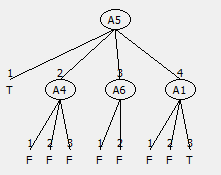 \
As seen in the image, the tree built using `buildTree` matches the tree we built manually.

#### 5.2 Building a full decision tree.

The model performs worse in the test set compared to the train set. This indicates that the trees overfit to a certain extent. There are unseen data characteristics which the current trees are unable to capture. Our assumption that the third three would be the hardest to model (due to the noise in the data) is also proven wrong. Here, the noise in the MONK-3 dataset actually works in our favour as it increases the generalisation capabilities of the model, evidenced by the higher accuracy rate compared to MONK-2 and MONK-1. 

In [12]:
t1 = d.buildTree(m.monk1, m.attributes)
t2 = d.buildTree(m.monk2, m.attributes)
t3 = d.buildTree(m.monk3, m.attributes)

df_results = pd.DataFrame({
    "Dataset": [
        "Monk-1", "Monk-2", "Monk-3"
    ],
    "E_train": [
        d.check(t1, m.monk1), 
        d.check(t2, m.monk2), 
        d.check(t3, m.monk3)
    ],
    "E_test": [
        d.check(t1, m.monk1test), 
        d.check(t2, m.monk2test), 
        d.check(t3, m.monk3test)
    ]
})
display(df_results)

,Dataset,E_train,E_test
0,Monk-1,1.0,0.828704
1,Monk-2,1.0,0.692130
2,Monk-3,1.0,0.944444


### Assignment 6

Pruning in decision trees is a technique used to balance the bias-variance trade-off by reducing overfitting. A fully grown tree has low bias but high variance, meaning it memorizes training data and performs poorly on unseen data. Pruning simplifies the tree by removing branches, which reduces variance and improves generalization, but at the cost of a slight increase in bias.

In [13]:
from tools import partition

monk1_train, monk1_val = partition(m.monk1, 0.6, use_seed=True)
monk2_train, monk2_val = partition(m.monk2, 0.6, use_seed=True)
monk3_train, monk3_val = partition(m.monk3, 0.6, use_seed=True)

In [14]:
from tools import prune_tree

t1 = d.buildTree(monk1_train, m.attributes)
t2 = d.buildTree(monk2_train, m.attributes)
t3 = d.buildTree(monk3_train, m.attributes)

t1_pruned = prune_tree(t1, monk1_val)
t2_pruned = prune_tree(t2, monk2_val)
t3_pruned = prune_tree(t3, monk3_val)

print("Tree performance without pruning:")
for i, (tree, test_set) in enumerate(
    [(t1, m.monk1test), (t2, m.monk2test), (t3, m.monk3test)]
):
    print(f"   Tree {i+1}: {d.check(tree, test_set)}")

print("Tree performance with pruning:")
for i, (tree, test_set) in enumerate(
    [(t1_pruned, m.monk1test), (t2_pruned, m.monk2test), (t3_pruned, m.monk3test)]
):
    print(f"   Tree {i+1}: {d.check(tree, test_set)}")


Tree performance without pruning:
   Tree 1: 0.7916666666666666
   Tree 2: 0.6342592592592593
   Tree 3: 0.9027777777777778
Tree performance with pruning:
   Tree 1: 0.8055555555555556
   Tree 2: 0.6574074074074074
   Tree 3: 0.9722222222222222


### Assignment 7

In [15]:
monk1_results = {}
monk3_results = {}

for i in range(30, 90, 10): 
    training_fraction = i/100
    monk1_results[i] = []
    monk3_results[i] = []
    for j in range(100):
        monk1_train, monk1_val = partition(m.monk1, training_fraction)
        monk3_train, monk3_val = partition(m.monk3, training_fraction)
        
        t1 = d.buildTree(monk1_train, m.attributes)
        t3 = d.buildTree(monk3_train, m.attributes)
        
        t1_pruned = prune_tree(t1, monk1_val)
        t3_pruned = prune_tree(t3, monk3_val)

        monk1_results[i].append(d.check(t1_pruned, m.monk1test))
        monk3_results[i].append(d.check(t3_pruned, m.monk3test))

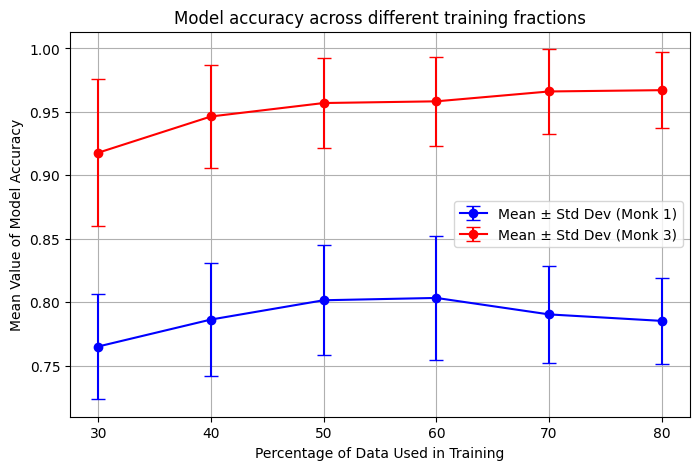

In [16]:
import statistics

keys = sorted(monk1_results.keys())
monk1_means = [statistics.mean(monk1_results[k]) for k in keys]
monk1_std_devs = [statistics.stdev(monk1_results[k]) for k in keys]
monk3_means = [statistics.mean(monk3_results[k]) for k in keys]
monk3_std_devs = [statistics.stdev(monk3_results[k]) for k in keys]

plt.figure(figsize=(8, 5))
plt.errorbar(keys, monk1_means, yerr=monk1_std_devs, fmt='o-', capsize=5, label="Mean ± Std Dev (Monk 1)", color='b')
plt.errorbar(keys, monk3_means, yerr=monk3_std_devs, fmt='o-', capsize=5, label="Mean ± Std Dev (Monk 3)", color='r')

plt.xlabel("Percentage of Data Used in Training")
plt.ylabel("Mean Value of Model Accuracy")
plt.title("Model accuracy across different training fractions")
plt.xticks(keys)
plt.legend()
plt.grid(True)
plt.show()

As can be seen in the graph, fraction of data used in training which maximises the model's accuracy in the test set should be around the range of 60 to 80%. This means that using as much data as reasonably possible is key to maximising the model's generalisation capabilities. It is of course important NOT to leave too few or even no data for the test/validation set, as that will prevent us from being able to properly evaluate the model's generalisation capabilities.

In [17]:
print("Mean and SD accuracy across different fractions of training data used")
display(pd.DataFrame({
    'Training Fraction': [x for x in range(30, 81, 10)],
    'MONK-1 Mean Accuracy': monk1_means,
    'MONK-1 SD Accuracy': monk1_std_devs,
    'MONK-3 Mean Accuracy': monk3_means,
    'MONK-3 SD Accuracy': monk3_std_devs
}))

Mean and SD accuracy across different fractions of training data used


,Training Fraction,MONK-1 Mean Accuracy,MONK-1 SD Accuracy,MONK-3 Mean Accuracy,MONK-3 SD Accuracy
0,30,0.765069,0.041553,0.917824,0.057990
1,40,0.786319,0.044270,0.946389,0.040436
2,50,0.801528,0.043433,0.956991,0.035266
3,60,0.803356,0.048740,0.958333,0.034875
4,70,0.790370,0.038541,0.966111,0.033293
5,80,0.785255,0.033818,0.967130,0.030021
